In [132]:
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
def clean_df(path): 
    """Clean the dataframe so that it has proper column titles."""
    path_df = pd.read_csv(path)
    # duplicate the first row
    path_df.loc[-1] = path_df.columns.tolist()
    path_df.index = path_df.index + 1
    path_df = path_df.sort_index()
    # rename columns
    df_result = path_df.rename(columns={f"{path_df.columns[0]}": "info", f"{path_df.columns[1]}": "info_vals", f"{path_df.columns[2]}": "info_units", f"{path_df.columns[3]}": "time", f"{path_df.columns[4]}": "values"})
    return df_result

def plot_df(signal_df): 
    """Plot the dataframe with values over time to visualize the data."""
    figure, axes = plt.subplots(figsize=(20, 5))
    # cast columns to float
    t = signal_df["time"].astype("float")
    v = signal_df["values"].astype("float")
    # plot signal
    axes.plot(t, v, linestyle='-', linewidth=0.1)
    plt.show()

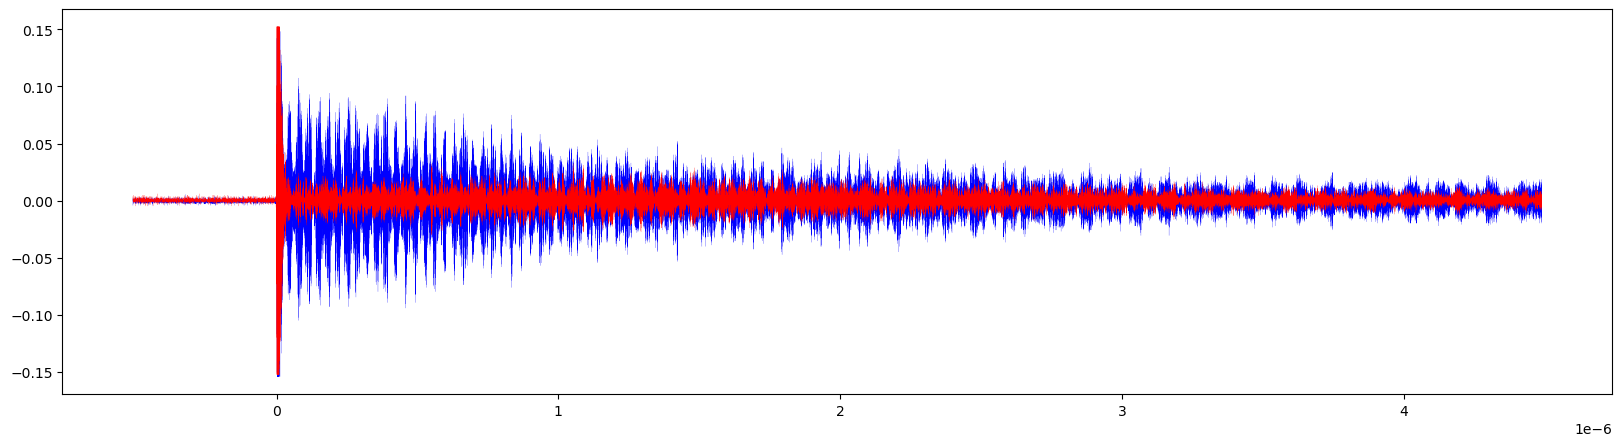

In [135]:
def create_full_df(): 
    """Create a large pandas DataFrame with "time" and "values" columns 
    order: set2_cav1, set2_cav2, set3_cav1, set3_cav2, etc. 
    column names: time_set2_cav1 and values_set2_cav1, etc.
    
    Algorithm: 
    rename the time and values columns for set2_cav1 (time_set2_cav1 and values_set2_cav1) 
    remove the other columns from set2_cav1
    for the rest of the files: 
    - rename their time and values columns following the naming convention 
    - remove their non-time and non-values columns
    - add those columns to the aggregate DataFrame
    return the resulting DataFrame
    """
    
    df_set2_cav1 = clean_df("/Users/jonathontordilla/Desktop/hombom24/scope-analysis/2024-07-03_fast_scope/set2_cav1.csv")
    rename_df_set2_cav1 = df_set2_cav1.rename(columns={"time": "time_set2_cav1", "values": "values_set2_cav1"})
    clean_df_set2_cav1 = rename_df_set2_cav1.loc[0:len(rename_df_set2_cav1["time_set2_cav1"]), "time_set2_cav1": "values_set2_cav1"]
    
    df_set2_cav2 = clean_df("/Users/jonathontordilla/Desktop/hombom24/scope-analysis/2024-07-03_fast_scope/set2_cav2.csv")
    rename_df_set2_cav2 = df_set2_cav2.rename(columns={"time": "time_set2_cav2", "values": "values_set2_cav2"})
    clean_df_set2_cav2 = rename_df_set2_cav2.loc[0:len(rename_df_set2_cav2["time_set2_cav2"]), "time_set2_cav2": "values_set2_cav2"]
    
    result_df = pd.concat([clean_df_set2_cav1, clean_df_set2_cav2], axis=1)
    
    for i in range(3, 13): 
        curr_df_cav1 = clean_df(f"/Users/jonathontordilla/Desktop/hombom24/scope-analysis/2024-07-03_fast_scope/set{i}_cav1.csv")
        curr_df_cav2 = clean_df(f"/Users/jonathontordilla/Desktop/hombom24/scope-analysis/2024-07-03_fast_scope/set{i}_cav2.csv")

        rename_cav1 = curr_df_cav1.rename(columns={"time": f"time_set{i}_cav1", "values": f"values_set{i}_cav1"})
        clean_cav1 = rename_cav1.loc[0:len(rename_cav1[f"time_set{i}_cav1"]), f"time_set{i}_cav1": f"values_set{i}_cav1"]
        rename_cav2 = curr_df_cav2.rename(columns={"time": f"time_set{i}_cav2", "values": f"values_set{i}_cav2"})
        clean_cav2 = rename_cav2.loc[0:len(rename_cav2[f"time_set{i}_cav2"]), f"time_set{i}_cav2": f"values_set{i}_cav2"]
        
        result_df[f"time_set{i}_cav1"] = clean_cav1[f"time_set{i}_cav1"]
        result_df[f"values_set{i}_cav1"] = clean_cav1[f"values_set{i}_cav1"]
        result_df[f"time_set{i}_cav2"] = clean_cav2[f"time_set{i}_cav2"]
        result_df[f"values_set{i}_cav2"] = clean_cav2[f"values_set{i}_cav2"]
        
    return result_df

def plot_all_df(full_df): 
    """Plot the dataframe with values over time to visualize the data."""
    figure, axes = plt.subplots(figsize=(20, 5))
    for i in range(2, 13): 
        # cast columns to float
        t1 = full_df[f"time_set{i}_cav1"].astype("float")
        v1 = full_df[f"values_set{i}_cav1"].astype("float")
        t2 = full_df[f"time_set{i}_cav2"].astype("float")
        v2 = full_df[f"values_set{i}_cav2"].astype("float")
        # plot signal for C1 and C2
        axes.plot(t1, v1, linestyle='-', linewidth=0.1, color='blue')
        axes.plot(t2, v2, linestyle='-', linewidth=0.1, color='red')
        plt.show()
        
create_full_df().head(10)
plot_all_df(create_full_df())